In [ ]:
# To use only Google Colab
# ! pip install matplotlib --upgrade

# Unidad I. Regresiones y reducción de dimensionalidad.

## Independencia de variables y medidas de asociación.

- Distribución conjunta de variables aleatorias.
 - Tablas de Contingencia.
 - Concepto de independencia.

Distribución conjunta (o *multivariada*)
- la distribución de la intersección dos o más variables aleatorias.
  - para dos variables: *distribución bivariada*
- En el caso de dos variables aleatorias $X$ e $Y$:
  - $P(X=x, Y=y)$
  - $P(X, Y)$
- Se debe cumplir:
  - $\sum_{i}\sum_{j} P(X=x_{i}, Y=y_{j}) = 1$

Probabilidad condicional:
- Probabilidad de que:
  - una de las variables tome un valor
  - dado que el valor otra variable haya sido fijada
- $P(x|y)$
  - Es la probabilidad de $x$ dado $y$.
  - Donde el valor de $y$ está fijado.
- Se cumple que:
  - $P(X=x, Y=y) = P(X=x|Y=y) \cdot P(Y=y)$
  - $P(X=x, Y=y) = P(Y=y|X=x) \cdot P(X=x)$

Variables independientes:
- Si $X$ e $Y$ son variables **independientes**, se cumple que:
- $P(X=x, Y=y) = P(X=x) \cdot P(Y=y)$
  - Es decir:
    - P(X=x|Y=y) = P(X=x)
    - P(Y=y|X=x) = P(Y=y)

Probabilidades marginales:
- Distribución de probabilidades de un subconjunto de las variables aleatorias.
- Para distribuciones conjuntas bivariadas:
  - P(X=x) (o P(Y=y))
  - $ P(X=x) = \sum_{y} P(X=x, Y=y)$


Las definiciones anteriores son para dos variables categóricas.
- Se extiende para variables continuas
- donde la función de densidad de probabilidad (*PDF*) conjunta se define como:



### Tablas de Contingencia

- Representan todas las combinaciones de valores posibles para
  - un determinado número de variables categóricas.
  - Lo más frecuente es representar dos variables.
    - Pero podrían representarse más.
- Pueden contener valores de probabilidad
  - pero también se usarse con frecuencias.

| Y \ X | x1 | x2 | x3 | P(Y=y) |
| ---   | ---| ---| ---| ---    |
| y1    |  a |  b |  c | a+b+c  |
| y2    |  d |  e |  f | d+b+f  |
| P(X=x)|a+d | d+e| c+f| total  |


### Construir tablas de contingencia a partir de los datos

In [6]:
import pandas as pd

data = [
    ["DP00004", "P49913", "Cathelicidin antimicrobial peptide", "Homo sapiens", "170", "No"],
    ["DP00007", "P27695", "DNA-(apurinic or apyrimidinic site) lyase", "Homo sapiens", "318", "No"],
    ["DP00011", "P0DMM9", "Sulfotransferase 1A3", "Homo sapiens", "295", "No"],
    ["DP00012", "P13569", "Cystic fibrosis transmembrane conductance regulator", "Homo sapiens", "1480", "No"],
    ["DP00013", "P0DN86", "Choriogonadotropin subunit beta 3", "Homo sapiens", "165", "No"],
    ["DP00016", "P38936", "Cyclin-dependent kinase inhibitor 1", "Homo sapiens", "164", "Si"],
    ["DP00017", "P49918", "Cyclin-dependent kinase inhibitor 1C", "Homo sapiens", "316", "Si"],
    ["DP00018", "P46527", "Cyclin-dependent kinase inhibitor 1B", "Homo sapiens", "198", "Si"],
    ["DP00023", "P14061", "Estradiol 17-beta-dehydrogenase 1", "Homo sapiens", "328", "No"],
    ["DP00028", "Q13541", "Eukaryotic translation initiation factor 4E-binding protein 1", "Homo sapiens", "118", "Si"],
    ["DP00030", "P04150", "Glucocorticoid receptor", "Homo sapiens", "777", "No"],
    ["DP00033", "P10912", "Growth hormone receptor", "Homo sapiens", "638", "No"],
    ["DP00039", "P05204", "Non-histone chromosomal protein HMG-17", "Homo sapiens", "90", "Si"],
    ["DP00040", "P17096", "High mobility group protein HMG-I/HMG-Y", "Homo sapiens", "107", "Si"],
    ["DP00054", "P78356", "Phosphatidylinositol 5-phosphate 4-kinase type-2 beta", "Homo sapiens", "416", "No"],
    ["DP00061", "P27694", "Replication protein A 70 kDa DNA-binding subunit", "Homo sapiens", "616", "No"],
    ["DP00062", "P19793", "Retinoic acid receptor RXR-alpha", "Homo sapiens", "462", "No"],
    ["DP00069", "P63027", "Vesicle-associated membrane protein 2", "Homo sapiens", "116", "No"],
    ["DP00070", "P37840", "Alpha-synuclein", "Homo sapiens", "140", "Si"],
    ["DP00072", "Q8WZ42", "Titin", "Homo sapiens", "34350", "Si"],
    ["DP00043", "P02929", "Protein TonB", "Escherichia coli (strain K12)", "239", "No"],
    ["DP00088", "P0ABI8", "Cytochrome bo(3) ubiquinol oxidase subunit 1", "Escherichia coli (strain K12)", "663", "No"],
    ["DP00089", "P0ABJ1", "Cytochrome bo(3) ubiquinol oxidase subunit 2", "Escherichia coli (strain K12)", "315", "No"],
    ["DP00100", "P0A6H5", "ATP-dependent protease ATPase subunit HslU", "Escherichia coli (strain K12)", "443", "No"],
    ["DP00103", "P09372", "Protein GrpE", "Escherichia coli (strain K12)", "197", "No"],
    ["DP00107", "P69924", "Ribonucleoside-diphosphate reductase 1 subunit beta", "Escherichia coli (strain K12)", "376", "No"],
    ["DP00140", "P0A7L8", "50S ribosomal protein L27", "Escherichia coli (strain K12)", "85", "Si"],
    ["DP00145", "P0A7S3", "30S ribosomal protein S12", "Escherichia coli (strain K12)", "124", "No"],
    ["DP00146", "P0A7T7", "30S ribosomal protein S18", "Escherichia coli (strain K12)", "75", "Si"],
    ["DP00147", "P0A7U3", "30S ribosomal protein S19", "Escherichia coli (strain K12)", "92", "No"],
    ["DP00161", "P77173", "Cell division protein ZipA", "Escherichia coli (strain K12)", "328", "No"],
    ["DP00190", "P38038", "Sulfite reductase [NADPH] flavoprotein alpha-component", "Escherichia coli (strain K12)", "599", "No"],
    ["DP00194", "P0AFZ3", "Stringent starvation protein B", "Escherichia coli (strain K12)", "165", "No"],
    ["DP00197", "P0A707", "Translation initiation factor IF-3", "Escherichia coli (strain K12)", "180", "No"],
    ["DP00207", "P21513", "Ribonuclease E", "Escherichia coli (strain K12)", "1061", "No"],
    ["DP00242", "P0AG63", "30S ribosomal protein S17", "Escherichia coli (strain K12)", "84", "Si"],
    ["DP00252", "P0A877", "Tryptophan synthase alpha chain", "Escherichia coli (strain K12)", "268", "No"],
    ["DP00299", "P0AE70", "Endoribonuclease toxin MazF", "Escherichia coli (strain K12)", "111", "No"],
    ["DP00301", "P0ABQ4", "Dihydrofolate reductase", "Escherichia coli (strain K12)", "159", "No"],
    ["DP00337", "P06968", "Deoxyuridine 5'-triphosphate nucleotidohydrolase", "Escherichia coli (strain K12)", "152", "No"],
]

df = pd.DataFrame(
    data = data,
    columns = ["DisprotID", "UniprotId", "Name", "Organism", "length", "Fully Disordered"]
)
df

,DisprotID,UniprotId,Name,Organism,length,Fully Disordered
0,DP00004,P49913,Cathelicidin antimicrobial peptide,Homo sapiens,170,No
1,DP00007,P27695,DNA-(apurinic or apyrimidinic site) lyase,Homo sapiens,318,No
2,DP00011,P0DMM9,Sulfotransferase 1A3,Homo sapiens,295,No
3,DP00012,P13569,Cystic fibrosis transmembrane conductance regu...,Homo sapiens,1480,No
4,DP00013,P0DN86,Choriogonadotropin subunit beta 3,Homo sapiens,165,No
5,DP00016,P38936,Cyclin-dependent kinase inhibitor 1,Homo sapiens,164,Si
6,DP00017,P49918,Cyclin-dependent kinase inhibitor 1C,Homo sapiens,316,Si
7,DP00018,P46527,Cyclin-dependent kinase inhibitor 1B,Homo sapiens,198,Si
8,DP00023,P14061,Estradiol 17-beta-dehydrogenase 1,Homo sapiens,328,No
9,DP00028,Q13541,Eukaryotic translation initiation factor 4E-bi...,Homo sapiens,118,Si


In [10]:
contin_df = pd.crosstab(df["Organism"], df["Fully Disordered"])
contin_df

Fully Disordered,No,Si
Organism,,
Escherichia coli (strain K12),17,3
Homo sapiens,12,8


In [17]:
prob_df = contin_df / contin_df.sum().sum()
prob_df

Fully Disordered,No,Si
Organism,,
Escherichia coli (strain K12),0.425,0.075
Homo sapiens,0.300,0.200


In [19]:
margin_disorder = prob_df.sum()
margin_disorder

Fully Disordered
No    0.725
Si    0.275
dtype: float64

In [26]:
margin_org = prob_df.sum(axis=1)
margin_org

Organism
Escherichia coli (strain K12)    0.5
Homo sapiens                     0.5
dtype: float64

In [8]:
import scipy.stats as st

st.contingency.crosstab(df["Organism"], df["Fully Disordered"])

((array(['Escherichia coli (strain K12)', 'Homo sapiens'], dtype=object),
  array(['No', 'Si'], dtype=object)),
 array([[17,  3],
        [12,  8]]))

## Medidas de asociación

### Variables continuas

#### Coeficiente correlación de Pearson

- El coeficiente de correlación de Pearson mide la relación lineal entre dos conjuntos de datos.
- Varía entre -1 y +1, con 0 implicando ninguna correlación.
- Correlaciones de -1 o +1 implican una relación lineal exacta.
- Correlaciones positivas implican que a medida que x aumenta, también lo hace y.
- Correlaciones negativas implican que a medida que x aumenta, y disminuye.
- $r_{XY} = \frac{\sum{(X_i - \bar{X})(Y_i - \bar{Y})}}{\sqrt{\sum{(X_i - \bar{X})^2} \cdot \sum{(Y_i - \bar{Y})^2}}}$


Text(0.05, 0.6, 'Pearson: 0.8689')

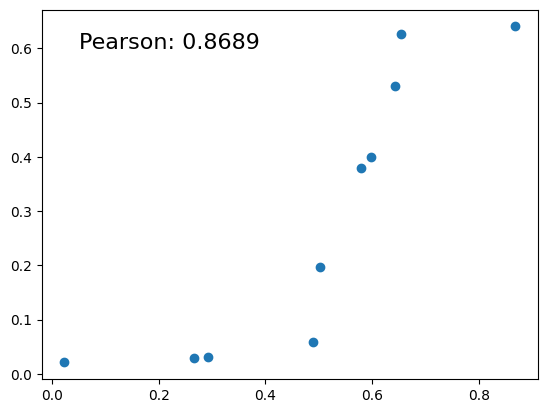

In [25]:

import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt

data = np.array([
  0.02256488, 0.26681332, 0.29162887, 0.48849624, 0.50184021,
  0.58003829, 0.59856923, 0.64207527, 0.65445321, 0.8683472
])

datay = np.array([
  0.02090346, 0.02950049, 0.03190492, 0.05852373, 0.19714768,
  0.37935066, 0.40032053, 0.52997007, 0.62628891, 0.64026217
])

fig, axes = plt.subplots()

axes.scatter(data,  datay)

coeff = st.pearsonr(data, datay)

axes.text(
  x=0.05,
  y=0.60,
  s = f"Pearson: {coeff.statistic:0.4f}",
  fontsize = 16
)


### Variables categóricas

#### Coeficiente de asociación de Cramer

El coeficiente de correlación de Cramer es una medida de asociación entre dos
variables categóricas en una tabla de contingencia. Es una generalización del
coeficiente de correlación de Pearson adaptada para variables categóricas.
El coeficiente de correlación de Cramer se denota como \( V \) y varía entre 0
y 1, donde 0 indica ausencia de asociación y 1 indica una asociación
perfecta entre las variables categóricas.

La fórmula para calcular el coeficiente de correlación de Cramer es:

$ V = \sqrt{\frac{\chi^2}{n \cdot \min((r - 1), (c - 1))}} $

Donde:
- \( V \) es el coeficiente de correlación de Cramer.
- \( \chi^2 \) es el estadístico chi-cuadrado asociado a la tabla de contingencia.
- \( n \) es el tamaño total de la muestra.
- \( r \) es el número de filas en la tabla de contingencia.
- \( c \) es el número de columnas en la tabla de contingencia.


In [46]:
import numpy as np

from scipy.stats.contingency import association, crosstab

data = {
  "paciente": [
    'P1', 'P2', 'P3', 'P4', 'P5', 'P6',
    'P7', 'P8', 'P9', 'P10', 'P11', 'P12',
    'P13', 'P14', 'P15', 'P16', 'P17', 'P18'
  ],
  "droga": [
    'C', 'B', 'C', 'A', 'A', 'A',
    'A', 'B', 'C', 'C', 'C', 'C',
    'C', 'B', 'B', 'A', 'B', 'C'
  ],
  "tiempo": [
    'Mañana', 'Noche', 'Mañana', 'Mañana', 'Noche', 'Noche',
    'Noche', 'Mañana', 'Noche', 'Mañana', 'Mañana', 'Noche',
    'Mañana', 'Mañana', 'Mañana', 'Mañana', 'Mañana', 'Noche'
  ],
  "resultado": [
    'Positivo', 'Negativo', 'Positivo', 'Negativo', 'Negativo', 'Negativo',
    'Negativo', 'Negativo', 'Positivo', 'Positivo', 'Positivo', 'Negativo',
    'Negativo', 'Negativo', 'Positivo', 'Negativo', 'Positivo', 'Positivo'
  ]
}
df = pd.DataFrame(data)

t_v_r = crosstab(df.tiempo, df.resultado)
t_v_r = crosstab(df.droga, df.resultado)

association(t_v_r[1], method="cramer")

0.6264982043070834

### Ambos tipos de variables


#### Correlación de rankings de Spearman.


- El coeficiente de correlación de Spearman
  - es una medida de asociación entre dos variables
  - se basa en los rankings de los datos en lugar de en los valores brutos.

- Es adecuada para datos ordinales o cuando los datos no siguen una
  distribución normal.

- El coeficiente de correlación de Spearman varía entre -1 y 1.
- Un valor cercano a 1 indica una relación monótona creciente entre las dos
  variables,
- mientras que un valor cercano a -1 indica una relación monótona
  decreciente.
- Un valor de 0 indica la ausencia de una relación monotónica
  entre las variables.

- La fórmula para calcular el coeficiente de correlación de Spearman es:

$\rho = 1 - \frac{6 \sum{d^2}}{n(n^2 - 1)} $

Donde:
- ( $\rho$ ) es el coeficiente de correlación de Spearman.
- ( d ) es la diferencia entre los ranking de las dos variables para cada observación.
- ( n ) es el número total de observaciones.



In [5]:
from scipy.stats import spearmanr

# Datos de ejemplo
variable1 = [
  "A", "B", "A", "C", "B", "A",
  "B", "B", "C", "C", "A", "A"
] # A > B > C
variable2 = [
  "Z", "Y", "Y", "X", "Z", "Z",
  "Y", "Y", "X", "X", "Z", "Y"
] # Z > Y > X

# Asignar rangos a las categorías
mapeo_variable1 = {categoria: i for i, categoria in enumerate(["A", "B", "C"])}
mapeo_variable2 = {categoria: i for i, categoria in enumerate(["Z", "Y", "X"])}
rank_variable1 = [mapeo_variable1[categoria] for categoria in variable1]
rank_variable2 = [mapeo_variable2[categoria] for categoria in variable2]

# Calcular la correlación de Spearman
spearman_corr, p_value = spearmanr(rank_variable1, rank_variable2)

print("Coeficiente de correlación de Spearman:", spearman_corr)


Coeficiente de correlación de Spearman: 0.7678571428571428


#### Coeficiente de correlación de Kendall

- El coeficiente de correlación de Kendall
  - es una medida de asociación no paramétrica
  - evalúa la concordancia de los rankings entre dos variables.
- Es útil cuando se trabaja con datos ordinales o de rankings.

- El coeficiente de correlación de Kendall varía entre -1 y 1.

- Un valor cercano a 1 indica una fuerte concordancia entre los rankings de las
dos variables,

- mientras que un valor cercano a -1 indica una fuerte discordancia.

- Un valor de 0 indica ausencia de asociación.

- La fórmula para calcular el coeficiente de correlación de Kendall es:

$ \tau = \frac{P - Q}{\sqrt{(P + Q + T) \cdot (P + Q + U)}} $

Donde:
- ( $\tau$ ) es el coeficiente de correlación de Kendall.
- ( P ) es el número de pares concordantes.
- ( Q ) es el número de pares discordantes.
- ( T ) es el número de pares con empates solo en la primera variable.
- ( U ) es el número de pares con empates solo en la segunda variable.


In [8]:
from scipy.stats import kendalltau

# Datos de ejemplo
variable1 = [
  "A", "B", "A", "C", "B", "A",
  "B", "B", "C", "C", "A", "A"
] # A > B > C
variable2 = [
  "Z", "Y", "Y", "X", "Z", "Z",
  "Y", "Y", "X", "X", "Z", "Y"
] # Z > Y > X

# Asignar rangos a las categorías
mapeo_variable1 = {categoria: i for i, categoria in enumerate(["A", "B", "C"])}
mapeo_variable2 = {categoria: i for i, categoria in enumerate(["Z", "Y", "X"])}
rank_variable1 = [mapeo_variable1[categoria] for categoria in variable1]
rank_variable2 = [mapeo_variable2[categoria] for categoria in variable2]

# Calcular la correlación de Spearman
kendall_coeff, p_value = kendalltau(rank_variable1, rank_variable2)

print("Coeficiente de correlación de Kendall:", kendall_coeff)


Coeficiente de correlación de Kendall: 0.723404255319149
